https://www.linkedin.com/pulse/nlp-a-complete-guide-topic-modeling-latent-dirichlet-sahil-m

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8ecb2c65dd13349e8788a4b888ccb1d777525a1432fcc0fd32494a58d12552e8
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=8d380311d1de6aa004c51e30f95a21f68c12a87c833df89a93bd2599c86a6249
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
import re
import nltk
import spacy
import gensim
import pyLDAvis
nltk.download('stopwords')
import numpy as np
import pandas as  pd
import seaborn as sns
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
scopusB = pd.read_csv('/content/drive/MyDrive/workshop/scopusB-stop-lem.csv', encoding = "ISO-8859-1")
scopusB.head(3)

,Title,Abstract,Author Keywords,Title_WithoutStop,Abstract_WithoutStop,TitleWithLemma,AbstractWithLemma
0,Denoising of electrocardiogram measurement sys...,Electrocardiogram(ECG) signal is the most impo...,Denoising; Electrocardiogram(ECG); Independent...,Denoising electrocardiogram measurement system...,Electrocardiogram(ECG) signal important medica...,Denoising electrocardiogram measurement system...,Electrocardiogram(ECG) signal important medica...
1,SwingPong: Analysis and suggestion based on mo...,Table tennis is a sport that everyone can play...,Accelerometer; Decision_tree; Feedback; Gyrosc...,SwingPong: Analysis suggestion based motion da...,"Table tennis sport everyone play, regardless a...",SwingPong: Analysis suggestion base motion dat...,"Table tennis sport everyone play, regardless a..."
2,A dynamic channel allocation algorithm based o...,The vertical handover decision algorithm plays...,Back_propagation_neural_network; Channel_alloc...,dynamic channel allocation algorithm based bac...,vertical handover decision algorithm plays imp...,dynamic channel allocation algorithm base back...,vertical handover decision algorithm play impo...


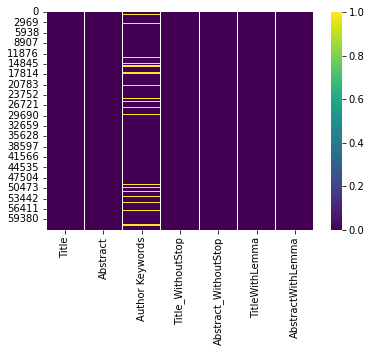

In [ ]:
sns.heatmap(scopusB.isnull(), cmap='viridis')

In [ ]:
scopusB['Title'] = scopusB['Title'].str.replace(' ', ' ;')
scopusB['Abstract'] = scopusB['Abstract'].str.replace(' ', ' ;')
scopusB['Author Keywords'].fillna(' ', inplace=True)

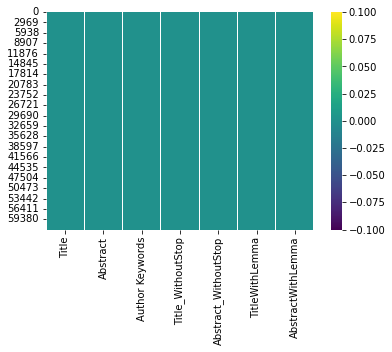

In [ ]:
sns.heatmap(scopusB.isnull(), cmap='viridis')

In [ ]:
scopusB['tags'] = scopusB['Title'] + ' ' + scopusB['Abstract'] + ' ' + scopusB['Author Keywords']

In [ ]:
scopusB_1000 = scopusB['tags'].head(1000)
scopusB_1000

0      Denoising ;of ;electrocardiogram ;measurement ...
1      SwingPong: ;Analysis ;and ;suggestion ;based ;...
2      A ;dynamic ;channel ;allocation ;algorithm ;ba...
3      Synthesis ;of ;PANI/hematite/PB ;hybrid ;nanoc...
4      The ;political ;dynamics ;of ;social ;security...
                             ...                        
995    Development ;of ;biodegradation ;process ;for ...
996    Double-row ;fixation ;of ;the ;transferred ;co...
997    Survival ;Advantage ;of ;African ;American ;Di...
998    In ;vivo ;estimation ;of ;head ;tissue ;conduc...
999    Axial ;compressive ;response ;of ;grouted ;cem...
Name: tags, Length: 1000, dtype: object

In [ ]:
instances = []
for doc in scopusB_1000 :
    instances.append([word for word in re.split('; | ;',doc)])
instances[0] #ไว้เช็ค

['Denoising',
 'of',
 'electrocardiogram',
 'measurement',
 'system',
 'based',
 'on',
 'statistical',
 'signal',
 'processing Electrocardiogram(ECG)',
 'signal',
 'is',
 'the',
 'most',
 'important',
 'of',
 'medical',
 'information',
 'used',
 'to',
 'diagnosis',
 'and',
 'indicates',
 'the',
 'condition',
 'of',
 'the',
 'heart',
 'in',
 'humans.',
 'In',
 'a',
 'design',
 'and',
 'construction',
 'of',
 'single-lead',
 'electrocardiogram',
 'measurement',
 'system',
 'using',
 'discrete',
 'component',
 'incorporated',
 'with',
 'data',
 'acquisition(DAQ)',
 'was',
 'a',
 'problem',
 'from',
 'the',
 'noise',
 'or',
 'external',
 'interference.',
 'The',
 'modern',
 'technology',
 'in',
 'signals',
 'processing',
 'used',
 'to',
 'perform',
 'a',
 'noise',
 'canceling',
 'in',
 'electrocardiography.',
 'In',
 'this',
 'paper,',
 'we',
 'propose',
 'the',
 'simulation',
 'study',
 'of',
 'modern',
 'signal',
 'processing',
 'technique',
 'to',
 'separate',
 'the',
 'single',
 'chann

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(instances)
# Create Corpus
texts = instances
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 5), (17, 1), (18, 1), (19, 2), (20, 5), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 4), (60, 1), (61, 2), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 4), (68, 8), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 4), (83, 2), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 8), (96, 1), (97, 5), (98, 2), (99, 1), (100, 2), (101, 2), (102, 1), (103, 2)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('2016', 1),
  ('?', 1),
  ('A', 1),
  ('Denoising', 1),
  ('ECG', 4),
  ('Electrocardiogram(ECG)', 1),
  ('FAS-TICA', 1),
  ('ICA', 2),
  ('ICA,', 1),
  ('ICA.', 1),
  ('IEEE. Denoising', 1),
  ('In', 2),
  ('Independent_Component_Analysis(ICA)', 1),
  ('Our', 1),
  ('SNR', 1),
  ('The', 2),
  ('a', 5),
  ('acquisition(DAQ)', 1),
  ('after', 1),
  ('algorithm', 2),
  ('and', 5),
  ('applied', 2),
  ('based', 1),
  ('before', 1),
  ('called', 1),
  ('canceling', 1),
  ('channel', 1),
  ('coefficient', 1),
  ('combinations', 1),
  ('component', 1),
  ('condition', 1),
  ('construction', 1),
  ('correlation', 1),
  ('data', 1),
  ('denoising', 1),
  ('design', 1),
  ('diagnosis', 1),
  ('discrete', 1),
  ('divide', 1),
  ('electrocardiogram', 2),
  ('electrocardiography.', 1),
  ('elements.', 1),
  ('error.', 1),
  ('experimental', 1),
  ('external', 1),
  ('from', 2),
  ('heart', 1),
  ('higher', 1),
  ('highperformance', 1),
  ('humans.', 1),
  ('important', 1),
  ('improved', 1),
  

In [ ]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(instances, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[instances], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[instances[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['Denoising', 'of', 'electrocardiogram', 'measurement', 'system', 'based_on', 'statistical', 'signal', 'processing Electrocardiogram(ECG)', 'signal', 'is', 'the', 'most', 'important', 'of', 'medical', 'information', 'used', 'to', 'diagnosis', 'and', 'indicates', 'the', 'condition', 'of', 'the', 'heart', 'in', 'humans.', 'In', 'a', 'design', 'and', 'construction', 'of', 'single-lead', 'electrocardiogram', 'measurement', 'system', 'using', 'discrete', 'component', 'incorporated', 'with', 'data', 'acquisition(DAQ)', 'was', 'a', 'problem', 'from', 'the', 'noise', 'or', 'external', 'interference.', 'The', 'modern', 'technology', 'in', 'signals', 'processing', 'used', 'to', 'perform', 'a', 'noise', 'canceling', 'in', 'electrocardiography.', 'In_this_paper,', 'we_propose', 'the', 'simulation', 'study', 'of', 'modern', 'signal', 'processing', 'technique', 'to', 'separate', 'the', 'single', 'channel', 'of', 'ECG', 'signals', 'from', 'noise', 'and', 'others', 'interference.', 'The', 'ECG', 'sign

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(instances)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp=spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

[['denoise', 'measurement', 'system', 'base', 'statistical', 'signal', 'processing', 'ecg', 'signal', 'important', 'medical', 'information', 'use', 'diagnosis', 'indicate', 'condition', 'heart', 'human', 'design', 'construction', 'single', 'lead', 'measurement', 'system', 'use', 'discrete', 'component', 'incorporate', 'data', 'acquisition', 'problem', 'noise', 'external', 'interference', 'modern', 'technology', 'signal', 'process', 'use', 'perform', 'noise', 'cancel', 'paper', 'study', 'modern', 'signal', 'processing', 'technique', 'separate', 'single', 'channel', 'signal', 'noise', 'other', 'interference', 'signal', 'perform', 'denoising', 'use', 'call', 'divide', 'multiple', 'combination', 'ecg', 'noise', 'statistically', 'independent', 'element', 'experimental', 'results_indicate', 'apply', 'high', 'apply', 'correlation', 'coefficient', 'snr', 'improve', 'minimum', 'error', 'ieee', 'denoise'], ['swingpong', 'analysis', 'suggestion', 'base', 'motion', 'datum', 'mobile', 'sensor', 'ta

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
#print(corpus[:1])

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('acquisition', 1),
  ('apply', 2),
  ('base', 1),
  ('call', 1),
  ('cancel', 1),
  ('channel', 1),
  ('coefficient', 1),
  ('combination', 1),
  ('component', 1),
  ('condition', 1),
  ('construction', 1),
  ('correlation', 1),
  ('data', 1),
  ('denoise', 2),
  ('denoising', 1),
  ('design', 1),
  ('diagnosis', 1),
  ('discrete', 1),
  ('divide', 1),
  ('ecg', 2),
  ('element', 1),
  ('error', 1),
  ('experimental', 1),
  ('external', 1),
  ('heart', 1),
  ('high', 1),
  ('human', 1),
  ('ieee', 1),
  ('important', 1),
  ('improve', 1),
  ('incorporate', 1),
  ('independent', 1),
  ('indicate', 1),
  ('information', 1),
  ('interference', 2),
  ('lead', 1),
  ('measurement', 2),
  ('medical', 1),
  ('minimum', 1),
  ('modern', 2),
  ('multiple', 1),
  ('noise', 4),
  ('other', 1),
  ('paper', 1),
  ('perform', 2),
  ('problem', 1),
  ('process', 1),
  ('processing', 2),
  ('results_indicate', 1),
  ('separate', 1),
  ('signal', 6),
  ('single', 2),
  ('snr', 1),
  ('statistical', 

In [ ]:
#baseline_model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           chunksize=200,
                                           passes=10,
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.020*"image" + 0.016*"use" + 0.016*"accuracy" + 0.015*"classification" + '
  '0.014*"feature" + 0.012*"performance" + 0.011*"application" + 0.010*"hand" '
  '+ 0.010*"system" + 0.009*"method"'),
 (1,
  '0.027*"use" + 0.019*"model" + 0.016*"study" + 0.012*"research" + '
  '0.011*"method" + 0.010*"system" + 0.010*"base" + 0.010*"develop" + '
  '0.009*"problem" + 0.009*"work"'),
 (2,
  '0.057*"cell" + 0.015*"induce" + 0.015*"effect" + 0.014*"expression" + '
  '0.014*"cancer" + 0.011*"protein" + 0.010*"extract" + 0.009*"result" + '
  '0.008*"level" + 0.008*"treatment"'),
 (3,
  '0.021*"high" + 0.018*"production" + 0.017*"temperature" + 0.016*"use" + '
  '0.014*"process" + 0.011*"efficiency" + 0.011*"fuel" + 0.010*"performance" + '
  '0.010*"energy" + 0.010*"base"'),
 (4,
  '0.025*"activity" + 0.020*"compound" + 0.012*"study" + 0.011*"extract" + '
  '0.011*"teacher" + 0.010*"inhibitor" + 0.009*"pla" + 0.008*"natural" + '
  '0.008*"show" + 0.008*"composite"'),
 (5,
  '0.019*"gene" +

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized,  dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -7.904363208353197

Coherence Score:  0.41341298418256606


In [ ]:
def compute_conherence_values(id2word,corpus,texts,limit,start=2,step=1):
  coherence_values = []
  model_list = []
  for num_topics in range(start,limit,step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             num_topics=num_topics,
                                             random_state=100,
                                             chunksize=200,
                                             passes=100,
                                             per_word_topics=True,
                                             id2word=id2word)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts,dictionary=id2word,coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_conherence_values(id2word,
                                                         corpus=corpus,
                                                         texts=data_lemmatized,
                                                         start=2,
                                                         limit=20,
                                                         step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

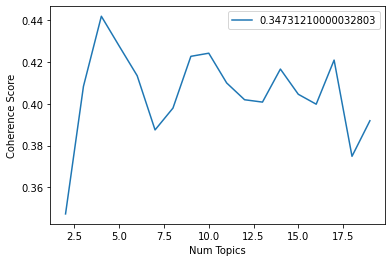

In [ ]:
limit=20;start=2;step=1;
x = range(start,limit,step)
plt.plot(x,coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend((coherence_values), loc='best')
plt.show()

In [ ]:
for m,cv in zip(x,coherence_values):
  print("Num Topics = ",m," has Coherence Value of",round(cv,4))

Num Topics =  2  has Coherence Value of 0.3473
Num Topics =  3  has Coherence Value of 0.4083
Num Topics =  4  has Coherence Value of 0.4419
Num Topics =  5  has Coherence Value of 0.4276
Num Topics =  6  has Coherence Value of 0.4135
Num Topics =  7  has Coherence Value of 0.3875
Num Topics =  8  has Coherence Value of 0.398
Num Topics =  9  has Coherence Value of 0.4227
Num Topics =  10  has Coherence Value of 0.4242
Num Topics =  11  has Coherence Value of 0.41
Num Topics =  12  has Coherence Value of 0.402
Num Topics =  13  has Coherence Value of 0.4008
Num Topics =  14  has Coherence Value of 0.4166
Num Topics =  15  has Coherence Value of 0.4046
Num Topics =  16  has Coherence Value of 0.3998
Num Topics =  17  has Coherence Value of 0.4209
Num Topics =  18  has Coherence Value of 0.3749
Num Topics =  19  has Coherence Value of 0.3919


In [ ]:
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           chunksize=200,
                                           passes=10,
                                           alpha=0.01,
                                            eta='symmetric',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4070947704997908


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_final, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.054919 -0.234851       1        1  16.959232
1     -0.088021 -0.125285       2        1   7.730763
3      0.034775  0.071958       3        1   6.642558
2      0.187638 -0.054697       4        1   6.303419
9     -0.024075  0.072112       5        1   6.017824
17     0.031531 -0.198083       6        1   5.684247
5      0.075806 -0.052403       7        1   5.420064
10     0.177336  0.077681       8        1   5.252794
4      0.185572 -0.000578       9        1   5.097896
11     0.006650  0.014272      10        1   4.502436
8     -0.063031  0.098915      11        1   3.849730
19    -0.111826  0.024698      12        1   3.687311
14     0.030283  0.132262      13        1   3.380400
16    -0.043658  0.015827      14        1   3.124403
15    -0.045688 -0.037032      15        1   2.992550
0     -0.226494 -0.041660      16        1   2.987956
18     0.014902  0.107615      17        1   2.927372
13    -0.071438 -0.012064      18        1   2.806926
6     -0.012885  0.158737      19        1   2.378901
12    -0.112295 -0.017423      20        1   2.253217, topic_info=          Term        Freq       Total Category  logprob  loglift
1401   patient  622.000000  622.000000  Default  30.0000  30.0000
475       cell  496.000000  496.000000  Default  29.0000  29.0000
491      group  458.000000  458.000000  Default  28.0000  28.0000
196   activity  296.000000  296.000000  Default  27.0000  27.0000
56      system  341.000000  341.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
862        oil   11.533915   59.485447  Topic20  -5.3543   2.1524
221       free   11.356954   62.148591  Topic20  -5.3698   2.0931
698   behavior   11.204305   73.527027  Topic20  -5.3833   1.9115
69    analysis   12.071110  366.636201  Topic20  -5.3088   0.3793
43       paper   10.718053  146.729016  Topic20  -5.4277   1.1762

[1213 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
60        7  0.293294      able
60       11  0.183309      able
60       15  0.073323      able
60       20  0.439941      able
6106     14  0.939778  abnormal
...     ...       ...       ...
879      16  0.034244     yield
879      17  0.022830     yield
147       6  0.913295     youth
147      20  0.057081     youth
1247      7  0.941258       zno

[2661 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 4, 3, 10, 18, 6, 11, 5, 12, 9, 20, 15, 17, 16, 1, 19, 14, 7, 13])

In [ ]:
def format_topics_sentences(ldamodel=None,corpus=corpus,texts=instances):
  sent_topics_df = pd.DataFrame()

  for i,row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list

    row = sorted(row,key=lambda x: (x[1]), reverse = True)
    for j,(topic_num,prop_topic) in enumerate(row):
      if j==0 :
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break

  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_final, corpus=corpus, texts=instances)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.4138,"gene, analysis, isolate, specie, sample, study...","[Denoising, of, electrocardiogram, measurement..."
1,1,12.0,0.7221,"type, sensory, use, cm, focus, sex, preference...","[SwingPong:, Analysis, and, suggestion, based,..."
2,2,0.0,0.6570,"image, use, accuracy, feature, classification,...","[A, dynamic, channel, allocation, algorithm, b..."
3,3,5.0,0.5352,"gene, analysis, isolate, specie, sample, study...","[Synthesis, of, PANI/hematite/PB, hybrid, nano..."
4,4,19.0,0.5547,"image, color, technique, visual, blood, concre...","[The, political, dynamics, of, social, securit..."
5,5,4.0,0.7108,"activity, compound, extract, teacher, study, i...","[Anti-inflammatory,, anti-bacterial, and, anti..."
6,6,3.0,0.4291,"high, production, use, temperature, process, e...","[The, development, and, application, of, the, ..."
7,7,12.0,0.6029,"type, sensory, use, cm, focus, sex, preference...","[Performance, comparison, between, real, estat..."
8,8,17.0,0.3250,"student, group, training, education, program, ...","[Effects, of, oxyresveratrol, and, its, deriva..."
9,9,11.0,0.5257,"result, cool, effect, flow, increase, nanoflui...","[Model, of, non-formal, education, and, inform..."


In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_final,corpus=corpus,texts=instances)

In [ ]:
df_topic_distribution = df_topic_sents_keywords['Dominant_Topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Dominant_Topic', 'Num Documents']
df_topic_distribution.sort_values("Dominant_Topic")

,Dominant_Topic,Num Documents
15,0.0,38
4,1.0,58
2,2.0,59
5,3.0,56
6,4.0,51
12,5.0,41
16,6.0,37
0,7.0,160
8,8.0,46
1,9.0,68


In [ ]:
import wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=2800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_final.show_topics(formatted=False)
topics

[(12,
  [('type', 0.017525593),
   ('sensory', 0.00865153),
   ('use', 0.0086112255),
   ('cm', 0.008524287),
   ('focus', 0.008082677),
   ('sex', 0.007876494),
   ('preference', 0.007192553),
   ('commercial', 0.0070112804),
   ('retromolar', 0.006954624),
   ('subject', 0.006897361)]),
 (3,
  [('high', 0.021054896),
   ('production', 0.018297216),
   ('use', 0.016844425),
   ('temperature', 0.01669157),
   ('process', 0.013649285),
   ('efficiency', 0.010253329),
   ('fuel', 0.010196069),
   ('performance', 0.010094636),
   ('base', 0.01004804),
   ('energy', 0.009796458)]),
 (18,
  [('adsorption', 0.016292965),
   ('phase', 0.015648114),
   ('pair', 0.014358581),
   ('removal', 0.013734789),
   ('use', 0.0133485235),
   ('find', 0.011848),
   ('effect', 0.01129869),
   ('show', 0.011245306),
   ('superconductor', 0.010273863),
   ('structure', 0.009989251)]),
 (7,
  [('patient', 0.03387336),
   ('group', 0.016968999),
   ('study', 0.014757196),
   ('treatment', 0.01083756),
   ('re

AttributeError: ignored

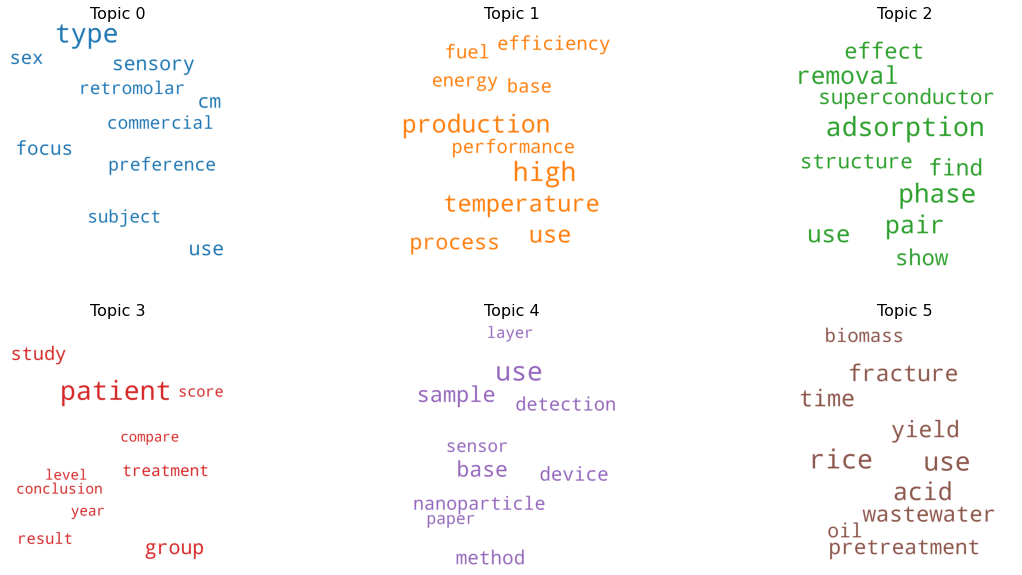

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20,10), sharex=True, sharey=True)

for i,ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  topic_words = dict(topics[i][1])
  cloud.generate_from_frequencies(topic_words,max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic '+str(i),fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplot_adjust(wspace=0,hspace=0)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout()
plt.show()